*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} = (\sum\limits_{i=1}^N x_ix_i)'_x = 2x
$$ 

## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
tr((A+dA)B) = tr(AB)+tr(dAB) = tr(AB) + tr(BdA)
$$

$$
tr(BdA)<=>\langle B^TdA\rangle
$$

$$
\frac{dy}{dA} = B^T
$$

## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

$$
y=(x+dx)^TAc = x^TAc + dx^TAc = \langle dx,Ac \rangle 
$$
$$
\frac{dy}{dx} = Ac
$$

$$
y = x^T(A+dA)c=x^TAc+x^TdAc
$$
$$
\frac{dy}{dA} =x^Tc
$$ 

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = tr((X - AS)(X - AS)^T)=tr(((X+dX) - AS)((X+dX) - AS)^T) = 
$$
$$
=tr(...)+tr(X(dX)^T+dXX^T-dX(AS)^T-AS(dX)^T)=
$$
$$
tr(A)=tr(A^T)
$$
$$
=tr(...)+tr(X(dX)^T)+tr(X(dX)^T)-tr(AS(dX)^T)-tr(AS(dX)^T)
$$
$$
tr(AB)=\langle A^TB \rangle
$$
$$
=\langle X^T,(dX)^T \rangle + \langle X^T,(dX)^T \rangle - \langle AS^T,(dX)^T \rangle - \langle (AS)^T,(dX)^T \rangle
$$
$$
\frac{dJ}{dS} =2X^T-2(AS)^T=2(X^T(AS)^T)
$$
You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} =  
$$ 
and 
$$
\frac{dF}{dS} =  
$$ 
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$ 

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*




In [1]:
def compute_distances_small_loops(X_train, X):

    dists = np.zeros(( len(X) , len(X_train) ))
        
    test_vector = np.concatenate([X for i in range(len(X_train))],axis=1).flatten()
    train_vector = np.concatenate([X_train.flatten() for i in range( len(X) )])
        
    squared_diff = (test_vector - train_vector)**2
    square_diff_tensor = squared_diff.reshape( len(X) , len(X_train) , X.shape[1] )
        
    for idx,i in enumerate(square_diff_tensor): 
        dists[idx] += np.sqrt(i.sum(axis=1)) 
    return dists

In [2]:
import numpy as np
from sklearn import datasets
iris_dataset = datasets.load_iris()
features = iris_dataset.data
target = iris_dataset.target

In [3]:
def train_test_split_data(X, y, train_percentage=0.7):
    num_data_points = X.shape[0]
    
    train_data_points = int(num_data_points * train_percentage)
    
    all_idx = np.arange(num_data_points)
    np.random.shuffle(all_idx)
    
    train_idx = all_idx[:train_data_points]
    test_idx = all_idx[train_data_points:]
    
    return X[train_idx], y[train_idx], X[test_idx], y[test_idx]

In [4]:
X_train, y_train, X_test, y_test = train_test_split_data(features, target)

In [5]:
dist_matrix = compute_distances_small_loops(X_train, X_test)

In [6]:
dist_matrix.shape

(45, 105)

<Axes: >

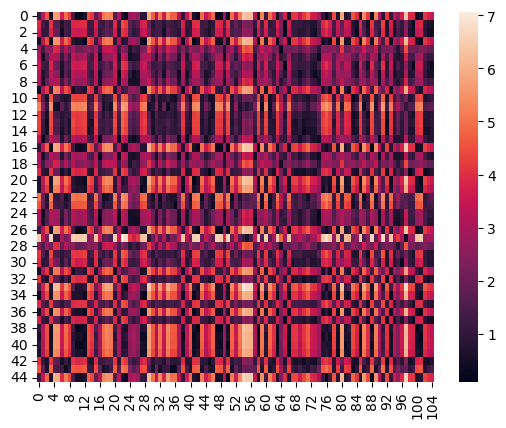

In [7]:
import seaborn as sns
sns.heatmap(dist_matrix)


    I can see strong distance differencies between groups of observations .
    Heatmap looks like "chess table" with dark and bright squares . 
    I guess the reason is the 
### What in the data is the cause behind the distinctly bright rows?   
    We can see bright rows because some of test points lie far from many of the train points .
    This test data point doesn’t have similar points in the train df .
### What causes the columns? 
    The reason is the same but now we are talking about train data points.This training data point 
    doesn’t have similar points in the test df .

### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*
1,2,3,4

#### *Your Explanation:*
    1)If we substracting the general mean , we just biasing our data , but do not destroy any
        'distance-relations' between points
    2)If we substracting the per pixel mean , we just biasing our data , but do not destroy any
        'distance-relations' between points
    3)General normalization is ok and do not destroy any
        'distance-relations' between points
    4)Per Pixel wise normalization is ok and do not destroy any
        'distance-relations' between points
    


## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*
 2(Half-True), 4

#### *Your Explanation:*
    1 - False , there are no hyperplanes in KNN cause it is non-linear classifier
    2 - (50/50) .There is no such thing as "train error"because fitting process inside the model is just
        remembering labels of train points , so phrase 'train score/train error' is inappropriate here,but
        if we would imagine that we testing KNN on train set, we would face the situation where nearest
        neighbor for every piont is the exact same point. So 'train loss' will be lower with k=1
    3 - False .Depends of the test set
    4 - True . Classification process means that algorithm calculate distances between all test points and all
        train points so calculation complexity grows with the size of the training set
